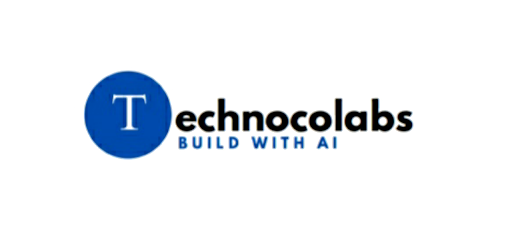

## XGBoost Model

**Contributors : Team A**
- Mukul Dev Mahato (Team Lead)
- Rohan Sahana
- M.Sharmila
- Md. Hossain
- Kaviya S
- Smriti Ojha

***

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("True_Car.csv")

In [3]:
df.head()

,Price,Year,Mileage,City,State,Make,Model,Age of car,Car Usage,City Importance,State Importance
0,16472,2015,18681,JEFFERSON CITY,MO,BUICK,ENCORECONVENIENCE,7,Low,Low,Moderate
1,15749,2015,27592,HIGHLAND,IN,BUICK,ENCOREFWD,7,Moderate,Low,Moderate
2,16998,2015,13650,BOONE,NC,BUICK,ENCORELEATHER,7,Low,Low,High
3,15777,2015,25195,NEW ORLEANS,LA,BUICK,ENCOREFWD,7,Moderate,Low,Moderate
4,16784,2015,22800,LAS VEGAS,NV,BUICK,ENCORECONVENIENCE,7,Low,High,Low


In [4]:
X = df.drop('Price',axis =1)
y = df['Price']

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Creating an OneHotEncoder object to contain all the possible categories

In [7]:
ohe=OneHotEncoder()
ohe.fit(X[['City', 'State', 'Make', 'Model', 'Car Usage', 'City Importance', 'State Importance']])

OneHotEncoder()

### Creating a column transformer to transform categorical columns

In [8]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['City', 
                                                                                 'State', 
                                                                                 'Make', 
                                                                                 'Model', 
                                                                                 'Car Usage', 
                                                                                 'City Importance', 
                                                                                 'State Importance']),
                                     remainder='passthrough')

### XGBoost Model

In [9]:
from xgboost import XGBRegressor

In [10]:
model = XGBRegressor()

### Making a pipeline

In [11]:
pipe=make_pipeline(column_trans,model)

### Fitting the model

In [12]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['ABBEVILLE', 'ABERDEEN', 'ABILENE', ..., 'ZELIENOPLE',
       'ZEPHYRHILLS', 'ZIONSVILLE'], dtype=object),
                                                                            array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone

In [13]:
y_pred=pipe.predict(X_test)

### Checking R2 Score

In [14]:
r2_score(y_test,y_pred)

0.791226957420404

R2 Score = 0.791226957420404 